In [1]:
import requests
import xml.etree.ElementTree as ET
from urllib.request import urlopen
from datetime import date, datetime
import matplotlib.pyplot as plt


In [2]:
url = "https://home.treasury.gov/sites/default/files/interest-rates/yield.xml"

r = requests.get(url)

root = ET.fromstring(r.text)
days = root.findall('.//G_BC_CAT')
last = days[-1]

# To get rates for each maturity time
def parse(node):
    return float(node.text)

m1 = parse(last.find('BC_1MONTH'))
m2 = parse(last.find('BC_2MONTH'))
m3 = parse(last.find('BC_3MONTH'))
m4 = parse(last.find('BC_4MONTH'))
m6 = parse(last.find('BC_6MONTH'))
y1 = parse(last.find('BC_1YEAR'))
y2 = parse(last.find('BC_2YEAR'))
y3 = parse(last.find('BC_3YEAR'))
y5 = parse(last.find('BC_5YEAR'))
y7 = parse(last.find('BC_7YEAR'))
y10 = parse(last.find('BC_10YEAR'))
y20 = parse(last.find('BC_20YEAR'))
y30 = parse(last.find('BC_30YEAR'))

# To get date for the latest data
def parse_date(node):
    return datetime.strptime(node.text, '%m-%d-%Y')

dates = root.findall('.//G_NEW_DATE')
chart_date = parse_date(dates[-1].find('NEW_DATE')).strftime("%d-%m-%Y")


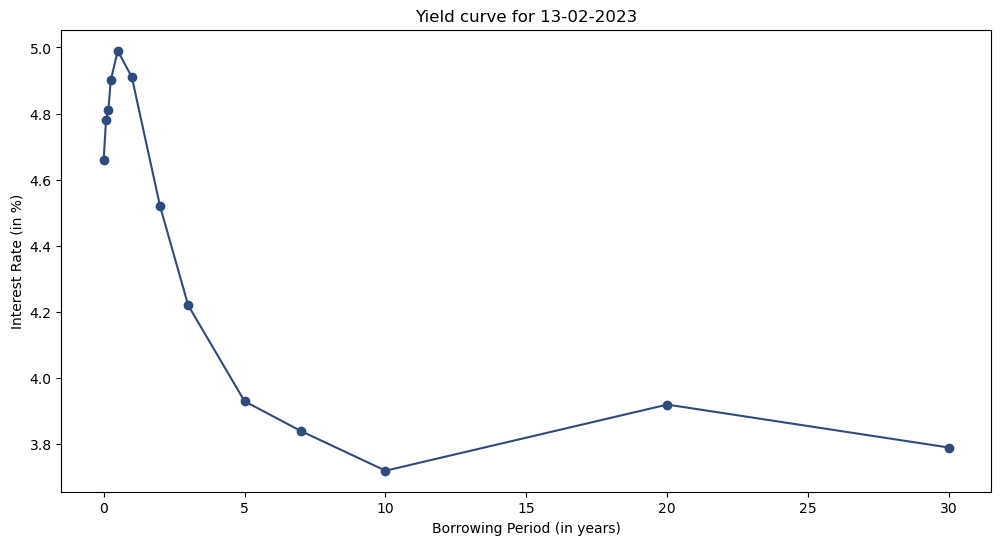

In [3]:
# Store the rates and the maturities (in years) for making the plot 
years = (0, 1/12, 2/12, 3/12, 6/12, 12/12, 24/12, 36/12, 60/12, 84/12, 120/12, 240/12, 360/12)
rates = (m1, m2, m3, m4, m6, y1, y2, y3, y5, y7, y10, y20, y30)

# Plot the yield curve
plt.figure(figsize=(12, 6))
plt.title(f'Yield curve for {chart_date}')
plt.xlabel('Borrowing Period (in years)')
plt.ylabel('Interest Rate (in %)')

plt.scatter(years, rates, c = '#2f4b7c')
plt.plot(years, rates, c = '#2f4b7c')

plt.savefig('yield_curve.png')